In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

%matplotlib inline

In [10]:
###Read contents of the .dat file and save output into a numpy array
f = open("trajectory/cycle1.dat", "r")
values = []
for line in f:
    values.append([float(x) for x in line.split()])
f.close()
points = np.array(values[1:])

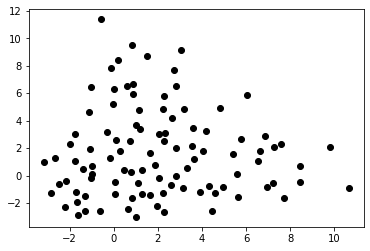

In [11]:
plt.plot(points[:,0], points[:,1], 'o', color="black")
plt.show()

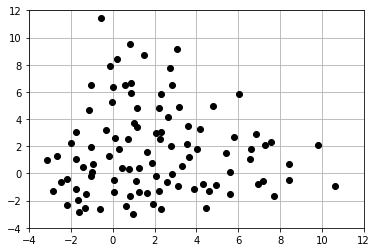

In [12]:
##Create a class with an initialization and update function to be fed into the matplotlib animation function

class UpdateDist:
    def __init__(self, ax):
        self.grid, = ax.plot([], [], 'o', color="black")
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(-4, 12)
        self.ax.set_ylim(-4, 12)
        self.ax.grid(True)

        
    def __call__(self, frame):
        #Each function call opens a different .dat file based on the value of the frames variable
        f = open(f"trajectory/cycle{frame}.dat", "r")
        values = []
        for line in f:
            values.append([float(x) for x in line.split()])
        f.close()
        points = np.array(values[1:])
        self.grid.set_data(points[:,0], points[:,1])
        return self.grid,

fig, ax = plt.subplots()
ud = UpdateDist(ax)

##MPL Documentation for this function: 
##https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib.animation.FuncAnimation
anim = FuncAnimation(fig, ud, frames=np.arange(1,101), interval=100, blit=True)

In [13]:
HTML(anim.to_html5_video())